In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
input_file = "C:\\Users\\ebi-_\\OneDrive\\Forge\\BA\\datasets\\breast-cancer.csv"

In [3]:
df = pd.read_csv(input_file, header=0, delimiter=";")
print(df)
#df.plot(kind="scatter", x="age", y="class", alpha=0.1)

                    class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import check_X_y

quant_transformer = QuantileTransformer()

cat_features = ["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
encoders = dict()
for col in cat_features:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    
#for col in cat_features:
#    arr = df[col].to_numpy()
#    cat, val = np.unique(arr, return_inverse=True)

y = df["class"].to_numpy()
classes, y = np.unique(y, return_inverse=True)

Xfeat = df[["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]]
X = Xfeat.to_numpy()

#print(label_encoder.inverse_transform([X[1][3]]))
X, y = check_X_y(X, y)
#g = QuantileTransformer(output_distribution="uniform", n_quantiles=286).fit_transform(X)

In [11]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

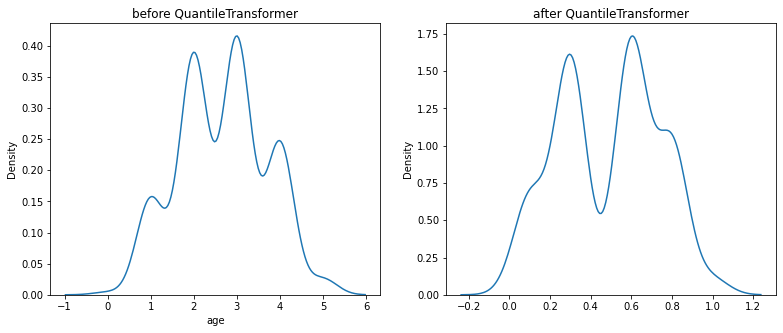

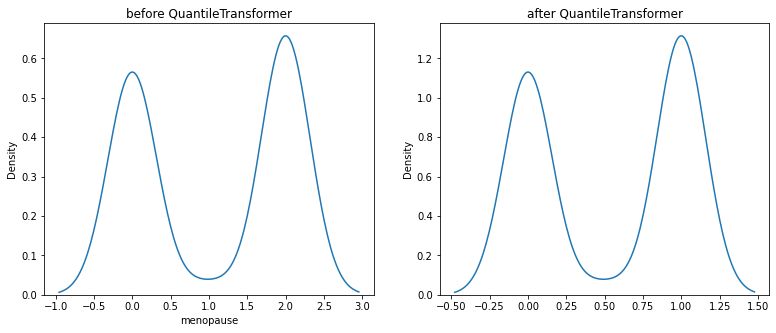

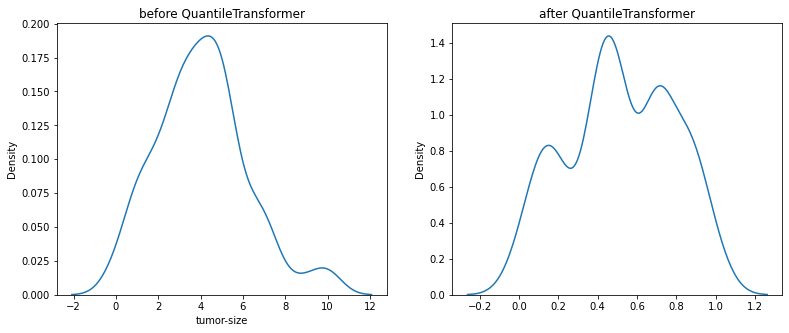

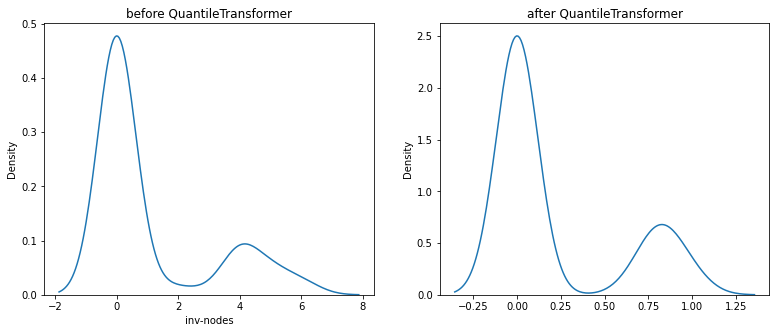

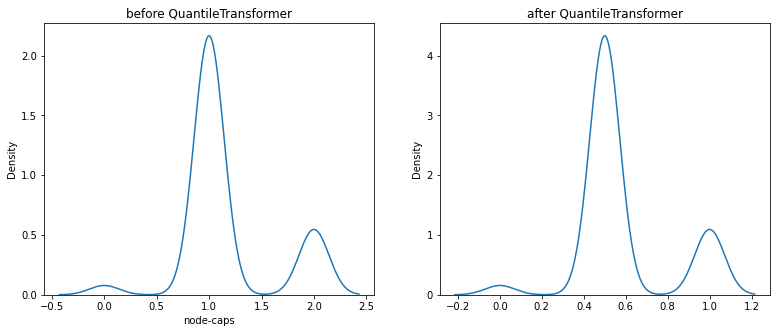

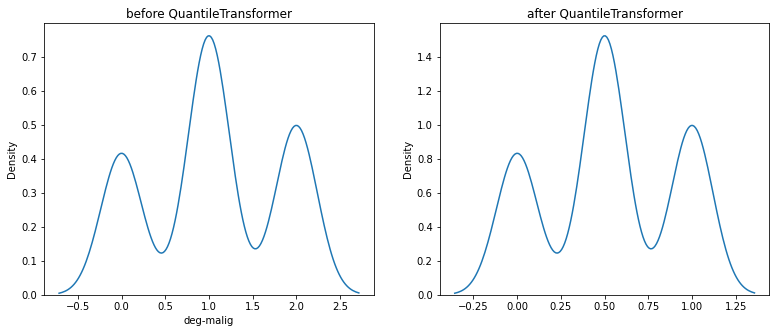

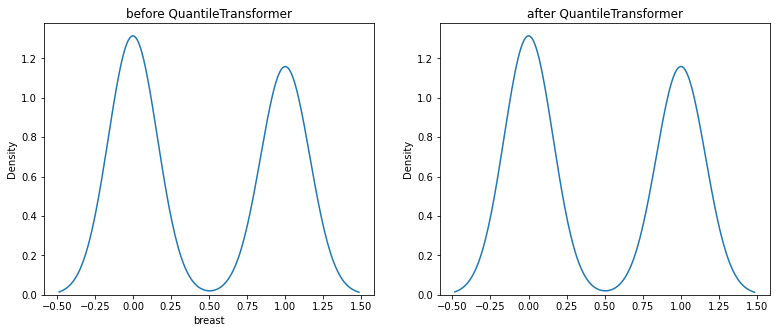

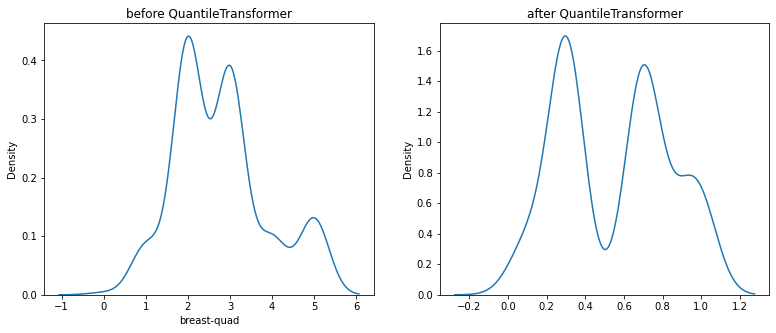

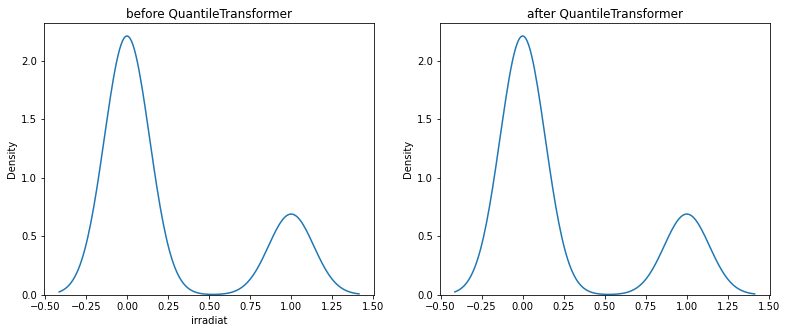

In [16]:

for feat in Xfeat.columns:
    plots(Xfeat, feat, QuantileTransformer(output_distribution="uniform", n_quantiles=6))